- 여러 개의 특성(feature)을 사용한 선형 회귀를 다중 회귀(multiple regression)라고 한다.
- 1개의 특성을 사용했을 때 선형회귀가 학습하는 것은 직선
- 특성이 2개면 선형회귀는 평면을 학습. 즉, 3차원 공간을 형성하고 타깃 = a * 특성1 + b * 특성2 + 절편
- 여러 개 특성(길이, 높이, 두께)을 사용. 이 때 길이, 높이, 두께 3개의 특성을 제곱하고 특성끼리 곱해서 또 다른 특성을 만듬 => 특성공학
- 특성공학 => 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업 => 사이킷런의 PolynomialFeatures 클래스 사용

In [2]:
# 라이브러리 임포트, fish 데이터 읽어오기
import numpy as np
import pandas as pd
import seaborn as seaborn
from matplotlib import pyplot as plt

In [3]:
# Fish.csv 파일 읽어오기
fish_df = pd.read_csv('data/Fish.csv')

In [4]:
# Perch 데이터 확인
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# 농어(perch) 무게 => perch_weight
# 농어 길이(Length2), 높이(Height), 두께(Width) => perch_full

perch_full = np.array(fish_df[fish_df['Species']=='Perch'][['Length2','Height','Width']])
perch_weight = np.array(fish_df[fish_df['Species']=='Perch']['Weight'])


In [6]:
# perch_full과 perch_weight를 훈련세트와 테스트세트로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

In [7]:
print(X_train.shape)

(42, 3)


- 사이킷런의 추정기(estimator) : LinearRegression 같은 모델 클래스 ( fit(), predict(), score() )
- 사이킷런의 변환기(transformer) : 특성을 만들거나 전처리하기 위한 클래스 ( fit(), transform(), fit_transform() )
- 다중 회귀에 사용할 여러 특성을 만들기 위해 PolynomialFeatures 클래스 사용

In [9]:
# PolynomialFeatures 클래스 임포트
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures 사용 예 => 2개의 특성(특성값 2, 3)으로 이루어진 샘플 하나를 적용
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]])) #  두 특성을 각각 제곱, 곱, 1x절편


[[1. 2. 3. 4. 6. 9.]]


In [10]:
# 특성값 3, 4를 이용해서 PolynomialFeatures 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit([[3, 4]])
print(poly.transform([[3, 4]])) #  두 특성을 각각 제곱, 곱, 1x절편


[[ 3.  4.  9. 12. 16.]]


In [11]:
# PolynomialFeatures의 inclue_bias = False 적용해서 절편에 기울기 삭제, 특성값 (2, 3) 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit_transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

- X_train 데이터에 변환기를 적용해 봅시다.

In [13]:
# X_train 데이터에 변환기를 적용하고 적용된 shape 확인
poly = PolynomialFeatures(include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
print(train_poly.shape)


(42, 9)


In [14]:
# 변환기에 의해 만들어진 9개의 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [15]:
# 테스트세트에도 변환기 적용
test_poly = poly.transform(X_test)

In [16]:
test_poly.shape

(14, 9)

- 변환된 특성을 사용하여 다중 회귀 모델 훈련

- 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다.
- 다만, 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐

In [19]:
# 다중 회귀(선형 회귀) 클래스 임포트 , 학습, 평가
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [20]:
print(lr.score(train_poly, y_train))

0.9903557670312703


In [21]:
# 테스트셋에 대해 평가 결과 확인
print(lr.score(test_poly, y_test))

0.9712376207461859


- 특성을 더 많이 추가해 보자. 5제곱까지 특성을 만들어서 추가해 보자.
- PolynomialFeatures 클래스의 degree 매개변수에 최대차수를 지정하면 된다.

In [23]:
# PolynomialFeatures 클래스의 degree 매개변수에 5를 적용하고 학습, 트레인셋과 테스트셋에 변환 적용 후 트레인셋 shape 출력
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)

In [24]:
# 변환기로 만들어진 55개 특성 확인
print(train_poly.shape)
poly.get_feature_names_out()

(42, 55)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [25]:
# 55개의 특성을 가진 데이터로 다시 훈련하고 score 확인
lr.fit(train_poly, y_train)

LinearRegression()

In [26]:
# 테스트셋 평가 점수 출력
lr.score(train_poly, y_train)

0.9999999999991127

- 테스트세트에서 점수가 음수가 나오는 문제가 생김
- 특성의 개수가 너무 많아 훈련세트에서는 점수가 높은데 테스트세트에서 점수가 너무 낮아 특성개수를 조정해야 함

In [28]:
lr.score(test_poly, y_test)

-129.88010840656509

##### 규제(regularization)
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
- 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일

- 규제는 계수(기울기)의 값을 조정하는 작업인데 기울기에 곱해지는 값( y = a * x1 + b * x2 + c => 여기에서 x1, x2 즉, 특성의 값)이 표준화가 되어 있지 않으면 기울기의 값을 조정했을 때 특성마다 값의 차이가 많이 발생되어 공정하게 제어될 수가 없음.
- 규제를 적용하기 전에 표준화 작업을 먼저 진행해야 함.
- 사이킷런의 StandardScaler 클래스 사용 : 변환기

In [31]:
# 변환기로 StandardScaler 클래스 사용. train_poly, test_poly 데이터셋 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
#print(train_scaled)

# 훈련세트로 학습한 변환기를 사용해 테스트 세트를 변환해야 함.

In [32]:
# 변환기에서 학습한 55개 평균값 출력
print(ss.mean_)
print(len(ss.mean_))
# np.mean(train_poly)
# np.mean(test_poly)

[2.84452381e+01 8.04177619e+00 4.82055476e+00 8.85315000e+02
 2.53470948e+02 1.51956220e+02 7.29276742e+01 4.36967156e+01
 2.62853281e+01 2.97326070e+04 8.59774772e+03 5.15176747e+03
 2.49656208e+03 1.49553817e+03 8.99087988e+02 7.27845314e+02
 4.35963245e+02 2.62077075e+02 1.58112864e+02 1.05917983e+06
 3.08417994e+05 1.84632019e+05 9.01174973e+04 5.39424625e+04
 3.23950805e+04 2.64197426e+04 1.58147036e+04 9.49827765e+03
 5.72355360e+03 7.77060032e+03 4.65212847e+03 2.79466584e+03
 1.68451523e+03 1.01877250e+03 3.93876111e+07 1.15189511e+07
 6.88783177e+06 3.37848356e+06 2.02012802e+06 1.21163040e+06
 9.93702300e+05 5.94216722e+05 3.56448011e+05 2.14482543e+05
 2.93083339e+05 1.75288678e+05 1.05174815e+05 6.33063832e+04
 3.82250476e+04 8.66772369e+04 5.18541727e+04 3.11238569e+04
 1.87420990e+04 1.13226020e+04 6.86230209e+03]
55


In [33]:
# 변환기에서 찾은 평균값과 표준편차의 개수 출력
print(ss.scale_) #  표준편차 

[8.72831196e+00 2.87358833e+00 1.74573191e+00 5.24782988e+02
 1.60841461e+02 9.64592547e+01 4.95192352e+01 2.97533677e+01
 1.81067398e+01 2.50155373e+04 7.49296931e+03 4.47073959e+03
 2.25444992e+03 1.34665908e+03 8.11717916e+02 6.81310084e+02
 4.07599636e+02 2.46192571e+02 1.50089750e+02 1.10854579e+06
 3.28258160e+05 1.95306597e+05 9.76209490e+04 5.80986077e+04
 3.48353554e+04 2.91614164e+04 1.73658328e+04 1.04243126e+04
 6.30611717e+03 8.75142767e+03 5.21660529e+03 3.13624408e+03
 1.90140305e+03 1.16234405e+03 4.77814865e+07 1.40488185e+07
 8.34532048e+06 4.14763816e+06 2.46276493e+06 1.47184197e+06
 1.22982188e+06 7.30120392e+05 4.36490352e+05 2.62699146e+05
 3.66313648e+05 2.17504713e+05 1.30118702e+05 7.84110886e+04
 4.75913605e+04 1.09624605e+05 6.51238868e+04 3.90004977e+04
 2.35420948e+04 1.43231941e+04 8.78330527e+03]


In [34]:
print(train_scaled.mean(), train_scaled.std())

6.1518851580961055e-18 1.0


- 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 한다.
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘는 계수의 절대값을 기준으로 규제를 적용
- 릿지를 더 선호
- 릿지와 라쏘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있음
- 사이킷런 라이브러리가 릿지, 라쏘 제공

##### 릿지 회귀
- 사이킷런 라이브러리에서 제공하기 때문에 fit()으로 훈련하고 score()로 평가
- train_scaled 데이터로 릿지 모델을 훈련해 보자

In [37]:
# Ridge 클래스 임포트, 학습, 평가
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))


0.9896217956447125


In [38]:
# 테스트셋 평가
print(ridge.score(test_scaled, y_test))

0.9788853860988008


- 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다.
- 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절
- alpha 값이 크면 규제의 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
- alpha 값은 사람이 지정해 줘야 하는 파라미터로 이런 파라미터를 하이퍼파라미터라고 한다.

- 적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R제곱(결정계수) 값의 그래프를 그려보는 것
- 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [41]:
# 트레인 스코어와 테스트 스코어 저장할 빈 리스트 생성
train_score = []
test_score = []


- alpha 값을 0.001에서 100까지 10배씩 늘려가면 릿지 회귀 모델을 훈련한 다은 훈련세트와 테스트세트의 점수를 저장

In [43]:

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #  log : -3, -2, -1, 0, 1, 2
for a in alpha_list:
    ridge = Ridge(alpha=a)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))




- 위에서 계산한 릿지의 alpha를 조정한 score 결과를 가지고 시각화를 해서 최적의 alpha 값을 찾아보자

In [45]:
print(train_score)
print(test_score)

[0.993067987569488, 0.9918120087949364, 0.9904048455941407, 0.9896217956447125, 0.9887366307205133, 0.9841994538470815]
[0.9560293715522125, 0.9796497117193994, 0.9826465162736676, 0.9788853860988008, 0.9722857046398284, 0.9624191421271446]


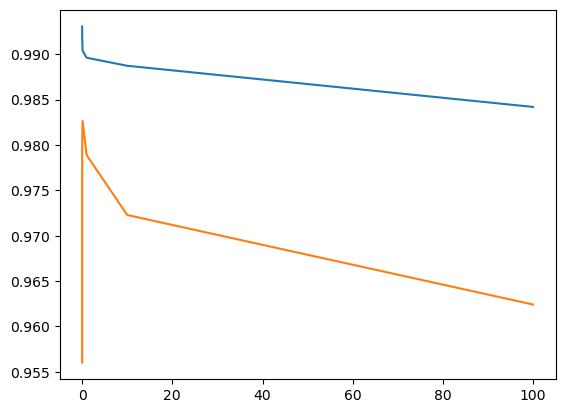

In [46]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)

- alpha 값이 0.001부터 100까지 이므로 그래프의 0값 근처에 값이 몰려있어서 최적의 alpha 값을 확인하기 어려움
- alpha 값이 있는 alpha_list의 6개의 값을 동일한 간격으로 나타내기 위해 상용 로그 함수로 바꾸어 지수로 표현해보자
- 0.001에 로그를 취하면 -3, 0.01에 로그를 취하면 -2

In [48]:
# 상용로그 테스트
np.log10(0.001)

-3.0

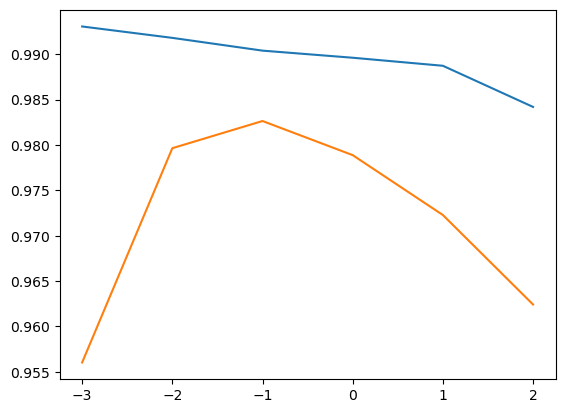

In [49]:
# 상용로그 취한 값을 x축으로 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

- 가장 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 0.1이다.
- 최적의 alpha 값을 찾았으니 alpha 값을 0.1로하여 최종 모델을 훈련하자

In [51]:
# Ridge의 alpha 값을 0.1로 학습, 평가
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))


0.9904048455941407
0.9826465162736676


##### 라쏘 회귀
- 라쏘 모델은 릿지와 매우 비슷
- Ridge 클래스를 Lasso 클래스로만 바꾸면 됨

In [53]:
# lasso 클래스 임포트, 학습, 평가
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, y_train)

Lasso()

- 라쏘도 과대적합을 잘 규제해 주네요

In [55]:
# 라쏘의 평가 점수 출력
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9898014198970121
0.9798798667260246


- 라쏘 모델도 alpha 매개변수로 규제의 강도 조절 할 수 있다.

In [57]:
# 라쏘의 alpha 값을 0.001, 0.01, 0.1, 1, 10, 100 으로 학습한 결과를 시각화
lasso_alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# [10**i for i in range(-3, 3)]
lasso_train_score = []
lasso_test_score = []

for a in lasso_alpha_list:
    lasso = Lasso(alpha=a, max_iter=30000)
    lasso.fit(train_scaled, y_train)
    lasso_train_score.append(lasso.score(train_scaled, y_train))
    lasso_test_score.append(lasso.score(test_scaled, y_test))

C:\Users\kj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.642e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.348e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


(-3.0, 1.5)

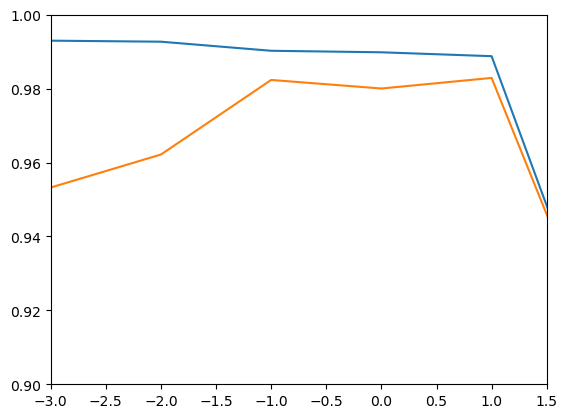

In [58]:
# 리지회귀와 마찬가지로 x 축에 log를 취한 결과 시각화
plt.plot(np.log10(lasso_alpha_list), lasso_train_score)
plt.plot(np.log10(lasso_alpha_list), lasso_test_score)
plt.ylim(0.9, 1)
plt.xlim(-3, 1.5)

- 라쏘 모델의 최적의 alpha 값은 1, 즉 10입니다.
- 이 값으로 다시 모델을 훈련해 보자

In [60]:
# 시각화로 찾은 최적의 alpha 값(10)을 적용해서 학습 후 평가
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9888208857886491
0.9823020708550176


- 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다고 했는데 라쏘 모델의 계수는 coef_ 속성에 있으니 확인해 봅시다.

In [62]:
# 라쏘로 찾은 기울기(계수) 값을 출력해서 0값이 있는지 확인
print(lasso.coef_)

[ 0.          0.          0.         13.11036343 55.12266859 41.48994624
  0.          0.         13.9830843   0.         43.4392343   4.64928255
 48.51500022  6.26668787 11.80207049  0.          0.         13.35211297
 22.11736679  0.          0.          0.          0.          0.
  0.         19.18672642  0.          0.          0.         15.53954944
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.55402184  0.          0.          0.
  0.         14.99032734  0.          0.          0.          0.
  0.        ]


In [63]:
# 라쏘 회귀에서 기울기 값이 0인 전체 개수 출력
# idx = 0
# for i in lasso.coef_:
#     if i == 0:
#         idx+=1
# print(idx, len(lasso.coef_))
print(np.sum(lasso.coef_ == 0))

40


- 55개 특성 중 라쏘 모델은 15개만 사용했다는 것을 알 수 있다.
- 이러한 라쏘 모델의 특징으로 데이터 특성에서 유용한 특성을 골라내는 용도로도 사용할 수 있다.

In [65]:
# 시각화로 찾은 최적의 alpha 값(10)을 적용해서 학습 후 평가
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.990158410124092
0.9818250769195748


C:\Users\kj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.790e+02, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [66]:
tmp = [10**i for i in range(-3, 3)]
print(tmp)

[0.001, 0.01, 0.1, 1, 10, 100]


In [ ]:
다중 : 여러개 특성값
다항 : 특성으로 특성을 여러개 만든다 

로지스틱회귀 : 회귀이지만 분류할 때 